## Exercise:  K-means

** Visualize the prostitution data (e.g. by plotting it on a map) ** 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# read file again using panda
crimes = pd.read_csv("../SFPD_Incidents.csv")

# clean data
districts_set = set(['MISSION', 'TENDERLOIN', 'NORTHERN', 'RICHMOND', 
                 'BAYVIEW', 'CENTRAL', 'PARK', 'TARAVAL', 'SOUTHERN', 'INGLESIDE'])

baddata = crimes[~crimes['PdDistrict'].isin(districts_set)]
crimes = crimes.drop(baddata.index)

baddata = crimes[crimes['Y'] > 38]
crimes = crimes.drop(baddata.index)

print "Number of crimes", len(crimes)

Number of crimes 2023721


In [2]:
print crimes[crimes['Y'] > 38].index

Int64Index([], dtype='int64')


In [3]:
import geoplotlib
from geoplotlib.utils import BoundingBox

pros_crimes = crimes[crimes['Category'] == 'PROSTITUTION']

geo_data_for_plotting = {"lat": pros_crimes['Y'],
                         "lon": pros_crimes['X']}

bbox = BoundingBox(north=37.819975, west=-122.513642, south=37.708003, east=-122.365565)
geoplotlib.set_bbox(bbox)
geoplotlib.kde(geo_data_for_plotting,bw=[2,2])
geoplotlib.inline()

('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 47.288847595565997)


** Train models of  K=2,…,10 on the prostitution data. **

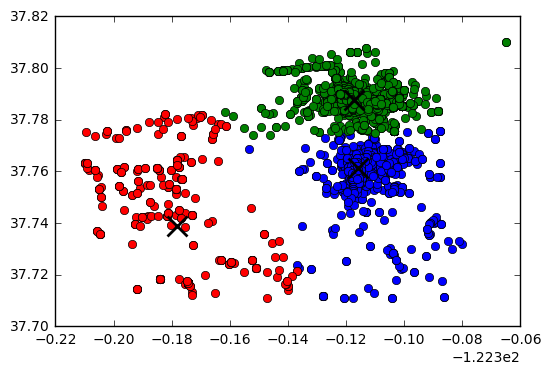

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

pros_crimes = crimes[crimes['Category'] == 'PROSTITUTION']
data = pros_crimes[['X','Y']]

f1 = pros_crimes['X'].values
f2 = pros_crimes['Y'].values

k = 3

X=np.matrix(zip(f1,f2))
kmeans = KMeans(n_clusters=k).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = X[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')

    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
plt.show()

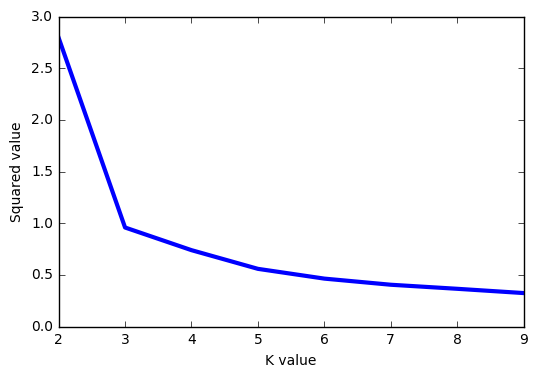

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

pros_crimes = crimes[crimes['Category'] == 'PROSTITUTION']
data = pros_crimes[['X','Y']]

f1 = pros_crimes['X'].values
f2 = pros_crimes['Y'].values
X=np.matrix(zip(f1,f2))

total_squared_error = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=(i)).fit(X)
    total_squared_error.append([i, kmeans.inertia_])

x, y = zip(*total_squared_error)

plt.xlabel(s="K value")
plt.ylabel(s="Squared value")
plt.plot(x, y, color='blue', linewidth=3)
plt.show()

** And by the way: The fit only gets better when we add more means - why not keep adding more of them: Explain in your own words why it makes sense to stop around a knee-point. **

Answer: Basically, you want to find a balance between two variables: the number of clusters (k) and the average variance of the clusters. You want to minimize the former while also minimizing the latter. Of course, as the number of clusters increases, the average variance decreases (up to the trivial case of k=n and variance=0).